# Linear Regression

In [1]:
# create lin looking data
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * np.random.randn(m, 1)

In [2]:
# calculating Qbest using normal eqn
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add X0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # @ inv()- inverse of matrix, @- matrix multi
theta_best

array([[ 4.64528847],
       [-0.68965984]])

In [3]:
# we got Q0=4.6 and Q1=-0.6 original eqn is 4+3x1+gaussian noise, og Q0=4 and Q1=3. close enough
# now making prediction with theta_best
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.64528847],
       [3.26596879]])

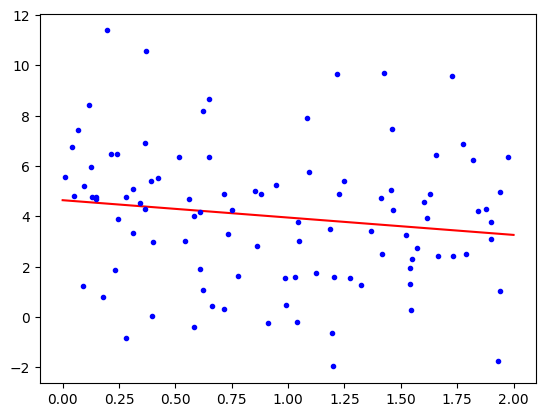

In [4]:
# plotting prediction
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="predictions")
plt.plot(X, y, "b.")
plt.show()

In [5]:
# now lin_reg using scikitlearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.64528847] [[-0.68965984]]
[[4.64528847]
 [3.26596879]]


In [6]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[ 4.64528847],
       [-0.68965984]])

# Batch gradient descent

In [7]:
eta = 0.1 # learning rate
n_epochs =1000
m = len(X_b) # no of instances

np.random.seed(42)
theta = np.random.randn(2, 1) # random init model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [8]:
theta

array([[ 4.64528847],
       [-0.68965984]])

# Stochastic gradient descent

In [9]:
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index +1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD no divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        

In [10]:
theta

array([[ 4.63153161],
       [-0.75364184]])

In [11]:
# using sklearn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [12]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.63853554]), array([-0.68204299]))

# polynomial regression

In [13]:
# generating random data (eg. quadratic eqn)
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)


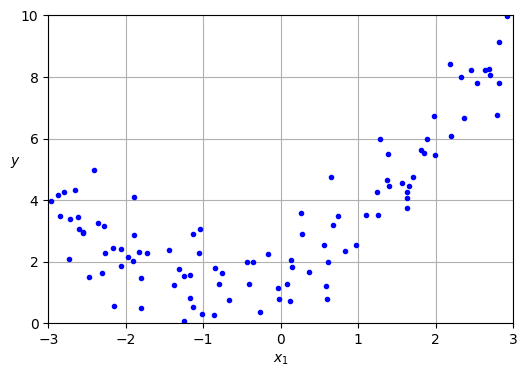

In [14]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures

# adding square(second degree polunomial) as new feature to training set
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [16]:
# now we can train on extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

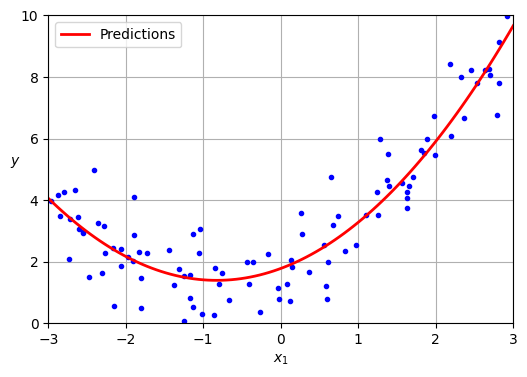

In [17]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()

plt.show()

# Learning curves

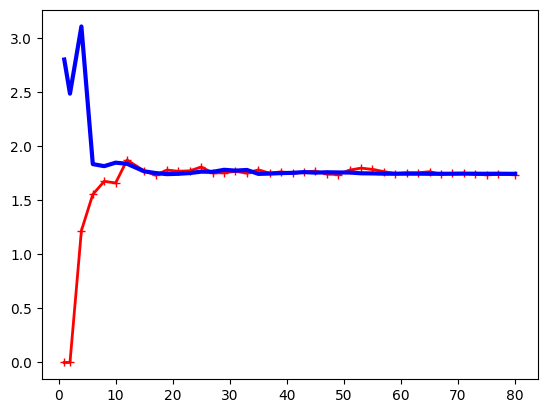

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01,1.0,40), cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.show()

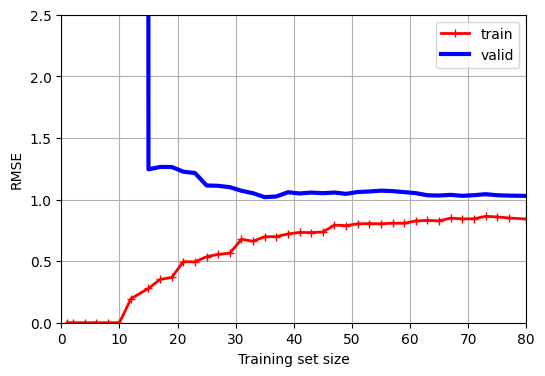

In [19]:
from sklearn.pipeline import make_pipeline

# now on 10 degree polynomial model
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])

plt.show()

In [20]:
# comment: on the 1st example its underfitting, poorly on training and validation
# as we add more training set errors are same
# on second example is overfitting
# model perform better on training and worst on validation

# Regularization

## Ridge regression

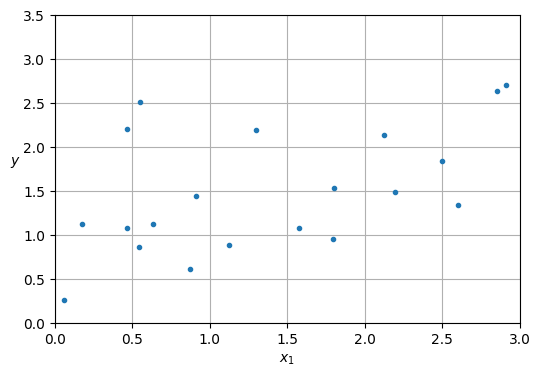

In [21]:
# generating random dataset
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

# plot
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [22]:
# ridge with closed form solution
from sklearn.linear_model import Ridge

ridge_rig = Ridge(alpha=0.1, solver="cholesky")
ridge_rig.fit(X,y)
ridge_rig.predict([[1.5]])

array([1.55325833])

In [23]:
# ridge using SGD
sgd_reg = SGDRegressor(penalty="l2",alpha=0.1/m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.55302613])

## Lasso regression

In [24]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic net regression

In [25]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])